## 타이타닉에서 살아남은 사람 예측.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
test_data = pd.read_csv('dataset/test.csv')
train_data = pd.read_csv('dataset/train.csv')

In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Column names description.
- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이 
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
http://writeren.tistory.com/68

### 1. 결측지 확인 및 제거.

In [5]:
# train 데이터 확인.
train_data.info()
print('\n')

# train_data 결측치 확인.
print('** train_data 결측지 ** \n', train_data.isnull().sum())

# train_data[age] 의 결측치 삭제
del_mar = train_data[['Age', 'Cabin', 'Embarked']].dropna()
print('\n** 결측치 삭제 ** \n', del_mar.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


** train_data 결측지 ** 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

** 결측치 삭제 ** 
      Age        Cabin Embarked
1   38.0          C85        C
3   35.0         C123        S
6   54.0          E46        S
10   4.0 

### 2. 상관관계 분석

In [6]:
# 차트.
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

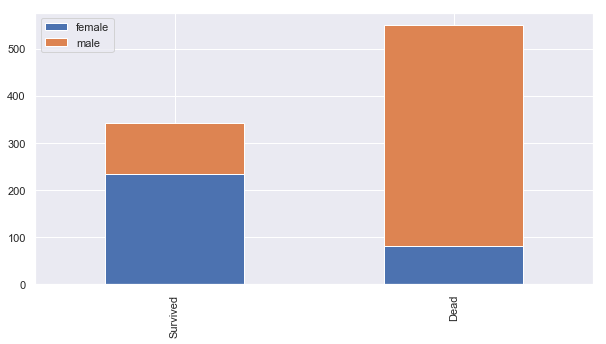

In [7]:
# 1. Survival by gender.
bar_chart('Sex')

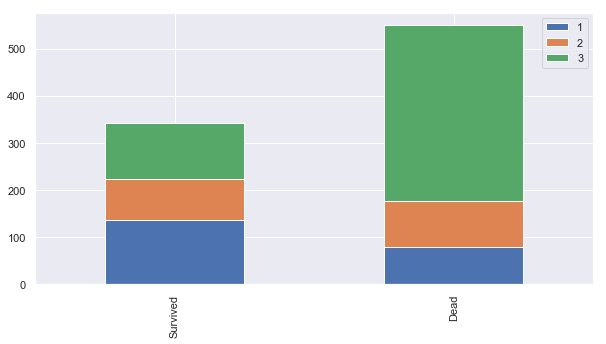

In [8]:
# 2. Survived according to Pclass.
bar_chart('Pclass')

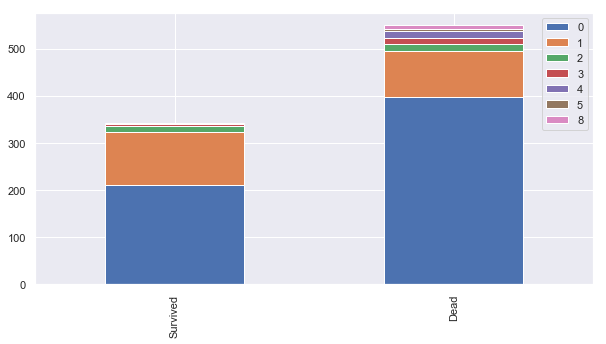

In [9]:
# 3. Survival with accompanying siblings, number of spouses.
bar_chart('SibSp')

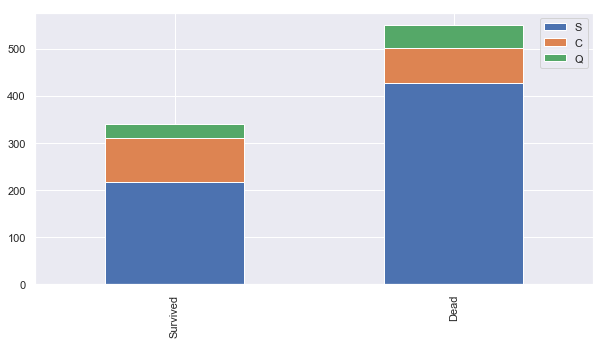

In [10]:
# 4. Survived according to Embarked.
bar_chart('Embarked')

## Preprocessing

In [11]:
# train data 확인
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Najib, Miss. Adele Kiamie ""Jane""",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- 객실등급, 성별, 나이, 요금에 따른 생존여부는 연관성이 있음.
- 이름, 성별은 문자값이기 때문에 숫자로 바꿔줘야 한다. (top 부분 참조)
- 객실번호(cabin) 삭제, 티켓의 고유넘버(ticket) 삭제. = 연관성이 없다고 판단됨.

Age 의 Null 을 어떻게 할 것인가, 범위는 어떻게 할 것인가.

In [12]:
# 1. Delete the unique number column of the Cabin number and ticket.

train_data = train_data.drop(['Cabin', 'Ticket'], axis=1)
test_data = test_data.drop(['Cabin', 'Ticket'], axis=1)

In [13]:
train_data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [14]:
test_data[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S


### preprocessing data['Embarked']

In [15]:
# Check the null value of Embarked.
train_data['Embarked'].isnull().sum()

# southampton
southampton = train_data[train_data['Embarked'] == 'S'].shape[0]
print("S : ", southampton)

# cherbourg
cherbourg = train_data[train_data['Embarked'] == 'C'].shape[0]
print("C : ", cherbourg)

# queenstown
queenstown = train_data[train_data['Embarked'] == 'Q'].shape[0]
print("Q : ", queenstown)

S :  644
C :  168
Q :  77


In [16]:
# filling missing valus with mean value per columns.
train_data['Embarked'].dtypes

train_data = train_data.fillna({'Embarked': 'S'})

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,2


In [17]:
train_data['Embarked'].isnull().sum()

0

### preprocessing data['Name']

In [18]:
all_name = [train_data, test_data]

for nameset in all_name:
    nameset['Title'] = nameset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
# Reduce data to 6.
# Mr, Mrs, Miss, Royal, Rare, Master

for nameset in all_name:
    nameset['Title'] = nameset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
                              'Jonkheer', 'Dona'], 'Rare')
    nameset['Title'] = nameset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    nameset['Title'] = nameset['Title'].replace('Mlle', 'Miss')
    nameset['Title'] = nameset['Title'].replace('Ms', 'Miss')
    nameset['Title'] = nameset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
# Replace the name part of the data with a number.

title_mapping = {'Master': 1, "Miss": 2, 'Mr': 3, 'Mrs': 4, 'Royal': 5, 'Rare': 6}
for nameset in all_name:
    nameset['Title'] = nameset['Title'].map(title_mapping)
    nameset['Title'] = nameset['Title'].fillna(0)

train_data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,3
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,3,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,1,4
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,2,4


In [21]:
# Delete train_data, test_data ['name', 'PassengerId']
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name', 'PassengerId'], axis=1)
all_data = [train_data, test_data]

train_data[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,3
1,1,1,female,38.0,1,0,71.2833,2,4
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,4
4,0,3,male,35.0,0,0,8.0500,1,3
5,0,3,male,NaN,0,0,8.4583,3,3
6,0,1,male,54.0,0,0,51.8625,1,3
7,0,3,male,2.0,3,1,21.0750,1,1
8,1,3,female,27.0,0,2,11.1333,1,4
9,1,2,female,14.0,1,0,30.0708,2,4


### preprocessing data['Sex']

In [22]:
# Change str(sex) to float.

gender_mapping = {'male': 1, 'female': 2}

for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)

train_data[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,1,3
1,1,1,2,38.0,1,0,71.2833,2,4
2,1,3,2,26.0,0,0,7.9250,1,2
3,1,1,2,35.0,1,0,53.1000,1,4
4,0,3,1,35.0,0,0,8.0500,1,3


### preprocessing data['Age']

In [23]:
# train_data['Age'].isnull().sum()
# ~5 minors, ~20 young, ~40 middle aged, ~60 elderly, ~ older

# set NaN to -0.5
train_data['Age'] = train_data['Age'].fillna(-0.5)
test_data['Age'] = test_data['Age'].fillna(-0.5)

bins = [-1, 0, 19, 31, 39, 59, 99]
label = ['Unknown', 'Minors', 'Young', 'Middle-aged', 'Elderly', 'Older']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins, labels=label)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins, labels=label)

train_data[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,7.2500,1,3,Young
1,1,1,2,38.0,1,0,71.2833,2,4,Middle-aged
2,1,3,2,26.0,0,0,7.9250,1,2,Young
3,1,1,2,35.0,1,0,53.1000,1,4,Middle-aged
4,0,3,1,35.0,0,0,8.0500,1,3,Middle-aged
5,0,3,1,-0.5,0,0,8.4583,3,3,Unknown
6,0,1,1,54.0,0,0,51.8625,1,3,Elderly
7,0,3,1,2.0,3,1,21.0750,1,1,Minors
8,1,3,2,27.0,0,2,11.1333,1,4,Young
9,1,2,2,14.0,1,0,30.0708,2,4,Minors


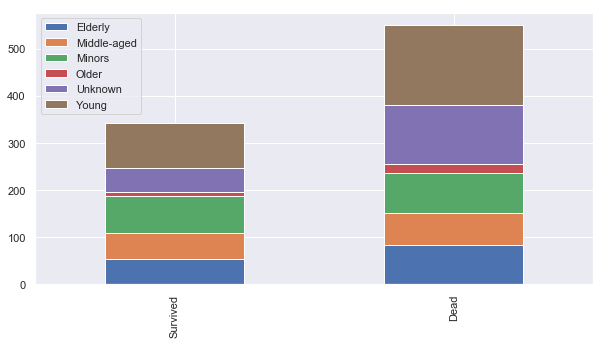

In [24]:
bar_chart('AgeGroup')

In [25]:
# Guessing age by title.

# title = 'Master': 1, "Miss": 2, 'Mr': 3, 'Mrs': 4, 'Royal': 5, 'Rare': 6
# label = 'Unknown', 'Minors', 'Young', 'Middle-aged', 'Elderly', 'Older'

# master, 1 = older,
# miss, 2 = young
# mr, 3 = young
# mrs, 4 = middle-aged
# royal, 5 = middle-aged
# rare, 6 = middle-aged

age_title_mapping = {1: 'Older', 2: 'Young', 3: 'Young', 4: 'Middle-aged', 5: 'Middle-aged', 6: 'Middle-aged'}

for x in range(len(train_data['AgeGroup'])):
    if train_data['AgeGroup'][x] == 'Unknown':
        train_data['AgeGroup'][x] = age_title_mapping[train_data['Title'][x]]

for x in range(len(test_data['AgeGroup'])):
    if test_data['AgeGroup'][x] == 'Unknown':
        test_data['AgeGroup'][x] = age_title_mapping[test_data['Title'][x]]

train_data[:10]
# test_data['AgeGroup'].isnull().sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,7.2500,1,3,Young
1,1,1,2,38.0,1,0,71.2833,2,4,Middle-aged
2,1,3,2,26.0,0,0,7.9250,1,2,Young
3,1,1,2,35.0,1,0,53.1000,1,4,Middle-aged
4,0,3,1,35.0,0,0,8.0500,1,3,Middle-aged
5,0,3,1,-0.5,0,0,8.4583,3,3,Young
6,0,1,1,54.0,0,0,51.8625,1,3,Elderly
7,0,3,1,2.0,3,1,21.0750,1,1,Minors
8,1,3,2,27.0,0,2,11.1333,1,4,Young
9,1,2,2,14.0,1,0,30.0708,2,4,Minors


In [26]:
# Replace 'AgeGroup' with a number

# 'Minors', 'Young', 'Middle-aged', 'Elderly', 'Older'

age_mapping = {'Minors': 1, 'Young': 2, 'Middle-aged': 3, 'Elderly': 4, 'Older': 5}

train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

# and delete 'Age'

train_data = train_data.drop(['Age'], axis=1)
test_data = test_data.drop(['Age'], axis=1)

train_data['AgeGroup'].isnull().sum()

0

In [27]:
train_data[:10]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,1,0,7.2500,1,3,2
1,1,1,2,1,0,71.2833,2,4,3
2,1,3,2,0,0,7.9250,1,2,2
3,1,1,2,1,0,53.1000,1,4,3
4,0,3,1,0,0,8.0500,1,3,3
5,0,3,1,0,0,8.4583,3,3,2
6,0,1,1,0,0,51.8625,1,3,4
7,0,3,1,3,1,21.0750,1,1,1
8,1,3,2,0,2,11.1333,1,4,2
9,1,2,2,1,0,30.0708,2,4,1


In [28]:
# Replace 'Fare' with a number (cutting 25%)

train_data['Fare'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])
test_data['Fare'] = pd.qcut(test_data['Fare'], 4, labels=[1, 2, 3, 4])

train_data[:10]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,1,1,0,1,1,3,2
1,1,1,2,1,0,4,2,4,3
2,1,3,2,0,0,2,1,2,2
3,1,1,2,1,0,4,1,4,3
4,0,3,1,0,0,2,1,3,3
5,0,3,1,0,0,2,3,3,2
6,0,1,1,0,0,4,1,3,4
7,0,3,1,3,1,3,1,1,1
8,1,3,2,0,2,2,1,4,2
9,1,2,2,1,0,3,2,4,1


In [73]:
test_data[:10]

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,3,1,0,0,1,3,3,3
1,3,2,1,0,1,1,4,4
2,2,1,0,0,2,3,3,5
3,3,1,0,0,2,1,3,2
4,3,2,1,1,2,1,4,2
5,3,1,0,0,2,1,3,1
6,3,2,0,0,1,3,2,2
7,2,1,1,1,3,1,3,2
8,3,2,0,0,1,2,4,1
9,3,1,2,0,3,1,3,2


## Data Modeling

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [30]:
# seperated x, y train_data

train_model = train_data.drop('Survived', axis=1)
target = train_data['Survived']

train_model.shape, target.shape

((891, 8), (891,))

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null category
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null int64
dtypes: category(1), int64(8)
memory usage: 56.8 KB


### kNN

In [53]:
knn_clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(knn_clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

array([0.92222222, 0.91011236, 0.8988764 , 0.92134831, 0.94382022,
       0.92134831, 0.87640449, 0.92134831, 0.93258427, 0.95505618])

In [54]:
# kNN Score
round(np.mean(score)*100, 2)

92.03

### Decision Tree

In [55]:
dec_clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(dec_clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
# Decision tree score
round(np.mean(score)*100, 2)

100.0

### Random Forest

In [32]:
rdf_clf = RandomForestClassifier(n_estimators=100)  # decision tree 100
rdf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
scoring = 'accuracy'
score = cross_val_score(rdf_clf, train_model, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

array([0.81111111, 0.85393258, 0.75280899, 0.78651685, 0.85393258,
       0.79775281, 0.80898876, 0.82022472, 0.78651685, 0.79775281])

In [34]:
# decision tree Score. (교차 검증 결과 평균 정확도)
round(np.mean(score)*100, 2)

80.7

### Naive Bayes

In [58]:
nb_clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(nb_clf, train_model, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

array([0.83333333, 0.74157303, 0.75280899, 0.70786517, 0.69662921,
       0.7752809 , 0.7752809 , 0.79775281, 0.84269663, 0.80898876])

In [59]:
# Naive bayes score
round(np.mean(score)*100, 2)

77.32

### SVM

In [60]:
svn_clf = SVC()
scoring = 'accuracy'
score = cross_val_score(svn_clf, train_model, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

array([0.82222222, 0.80898876, 0.80898876, 0.82022472, 0.84269663,
       0.80898876, 0.83146067, 0.85393258, 0.82022472, 0.85393258])

In [61]:
# SVM score
round(np.mean(score)*100, 2)

82.72

## TEST

In [77]:
test_data.isnull().sum()
# test = test_data.drop('Fare', axis=1).copy()
# test.isnull().sum()
test_data.dropna()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,3,1,0,0,1,3,3,3
1,3,2,1,0,1,1,4,4
2,2,1,0,0,2,3,3,5
3,3,1,0,0,2,1,3,2
4,3,2,1,1,2,1,4,2
5,3,1,0,0,2,1,3,1
6,3,2,0,0,1,3,2,2
7,2,1,1,1,3,1,3,2
8,3,2,0,0,1,2,4,1
9,3,1,2,0,3,1,3,2


In [78]:
clf = SVC()
clf.fit(train_data, target)

prediction = clf.predict(test_data)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [35]:
test_data[:5]

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,3,1,0,0,1,3,3,3
1,3,2,1,0,1,1,4,4
2,2,1,0,0,2,3,3,5
3,3,1,0,0,2,1,3,2
4,3,2,1,1,2,1,4,2


In [51]:
prediction = rdf_clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [38]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': prediction
})

submission.to_csv('submission.csv', index=False)

KeyError: 'PassengerId'

In [ ]:
submission = pd.read_csv('submission.csv')
submission[:10]